In [1]:
from dr_manhattan.exchanges import *
from backtester import *
from strategy_example import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
config = {
    "private_key": os.getenv("POLYMARKET_PRIVATE_KEY"),
    "funder": os.getenv("POLYMARKET_FUNDER"),
}

exchange = Polymarket(config)
print(f"Polymarket time-series ready ({'authenticated' if exchange.private_key else 'public'})")

Polymarket time-series ready (authenticated)


In [3]:
'''
BASE_URL: search_markets
ㄴ 여기는 모두 가져와짐.

PRICES_HISTORY_URL: fetch_price_history
DATA_API_URL: fetch_public_trades
ㄴ 이거 두개는 최근은 촘촘한데 뒤로 갈수록 점점 데이터가 엉성해짐. **recent trades only**

전부 가져오려면? -> 
① Dune Analytics / Flipside Crypto 기반 데이터 사용
이미 많은 팀이 Polymarket market 데이터셋을 올려놓음
→ 몇 백만 건의 체결 데이터도 다운 받을 수 있음

② 직접 온체인 이벤트 스캔
원하는 market의 conditional tokens / CLOB fills 가입 이벤트를
Polygon RPC에서 직접 스캔하면 전체 raw 히스토리 얻을 수 있음

③ Polymarket 지원팀에 “full history endpoint” 문의
현재로서는 /trades 로는 불가능함
→ 공식 문서도 /trades가 “recent trades only”임을 암시함
'''

BASE_URL = "https://gamma-api.polymarket.com"
CLOB_URL = "https://clob.polymarket.com"
PRICES_HISTORY_URL = f"{CLOB_URL}/prices-history"
DATA_API_URL = "https://data-api.polymarket.com"

In [ ]:
'''
price snapshot
epl 승부식 / nba
hourly daily BTC, ETH
'''

epl_tag = exchange.get_tag_by_slug('nba')

exchange.search_markets(
    limit=100,
    tag_id=epl_tag.id,
    closed=True,
    keywords=['Hawks'],
    log=True
)

current-offset: 0
page_limit: 100
----------


[Market(id='704574', question='Spread: Hawks (-11.5)', outcomes=['Hawks', 'Wizards'], close_time=datetime.datetime(2025, 11, 26, 0, 0, tzinfo=datetime.timezone.utc), volume=208.81254, liquidity=0.0, prices={'Wizards': 1.0}, metadata={'id': '704574', 'question': 'Spread: Hawks (-11.5)', 'conditionId': '0x2e8aac719b7af5e8b00d629c1fbf965a970a99678729d8bbcc9bdd27c563ab81', 'slug': 'nba-atl-was-2025-11-25-spread-away-11pt5', 'resolutionSource': 'https://www.nba.com/', 'endDate': '2025-11-26T00:00:00Z', 'startDate': '2025-11-25T23:11:27.643838Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/super+cool+basketball+in+red+and+blue+wow.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/super+cool+basketball+in+red+and+blue+wow.png', 'description': 'In the upcoming NBA game, scheduled for November 25 at 7:00 PM ET:\n\nThis market will resolve to "Hawks" if the Hawks win the game by 12 or more points.\n\nOtherwise, this market will resolve to "Wizards". If the ga

In [8]:
crypto_tag = exchange.get_tag_by_slug('crypto')
crypto_hourly = exchange.get_tag_by_slug('1H')
crypto_15min = exchange.get_tag_by_slug('15M')
crypto_daily = exchange.get_tag_by_slug('today')
crypto_hit = exchange.get_tag_by_slug('hit-price')

crypto_markets = exchange.search_markets(
    limit=100,
    tag_id=crypto_15min.id,
    closed=True,
    keywords = ['bitcoin'],
    log = True
)

print(len(crypto_markets))
crypto_markets

current-offset: 0
page_limit: 100
----------
25


[Market(id='703129', question='Bitcoin Up or Down - November 26, 9:00AM-9:15AM ET', outcomes=['Up', 'Down'], close_time=datetime.datetime(2025, 11, 26, 14, 15, tzinfo=datetime.timezone.utc), volume=85491.788769, liquidity=0.0, prices={'Up': 1.0}, metadata={'id': '703129', 'question': 'Bitcoin Up or Down - November 26, 9:00AM-9:15AM ET', 'conditionId': '0x70100d667b6ee24c6cbf5dcb34a88632a1f75475d0935356c48788a0ec2096c0', 'slug': 'btc-updown-15m-1764165600', 'resolutionSource': 'https://data.chain.link/streams/btc-usd', 'endDate': '2025-11-26T14:15:00Z', 'startDate': '2025-11-25T14:02:55.689103Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'description': 'This market will resolve to "Up" if the Bitcoin price at the end of the time range specified in the title is greater than or equal to the price at the beginning of that range. Otherwise, it will resolve to "Down".\nThe

In [9]:
target_market = crypto_markets[-1]
print(target_market)
print('')

trades = exchange.fetch_public_trades(market=target_market, limit=3000, as_dataframe=True, log=True)

Market(id='702833', question='Bitcoin Up or Down - November 26, 3:00AM-3:15AM ET', outcomes=['Up', 'Down'], close_time=datetime.datetime(2025, 11, 26, 8, 15, tzinfo=datetime.timezone.utc), volume=106507.252767, liquidity=0.0, prices={'Down': 1.0}, metadata={'id': '702833', 'question': 'Bitcoin Up or Down - November 26, 3:00AM-3:15AM ET', 'conditionId': '0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99c3d7bcdf1462625c891d', 'slug': 'btc-updown-15m-1764144000', 'resolutionSource': 'https://data.chain.link/streams/btc-usd', 'endDate': '2025-11-26T08:15:00Z', 'liquidity': '0', 'startDate': '2025-11-25T08:02:47.003543Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'description': 'This market will resolve to "Up" if the Bitcoin price at the end of the time range specified in the title is greater than or equal to the price at the beginning of that range. Otherwise, it will reso

In [ ]:
trades

,timestamp,side,asset,condition_id,size,price,proxy_wallet,title,slug,event_slug,outcome,outcome_index,name,pseudonym,bio,profile_image,profile_image_optimized,transaction_hash
0,2025-11-26 04:02:55+00:00,BUY,4087336493531742691607491398665180269837180146...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,29.00,0.500,0x87a2939399168f28b0dc5e9c01fdd145ffbda40f,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Up,0,0x87a2939399168F28B0DC5e9C01FdD145FfbdA40F-176...,Definitive-Alligator,,,,0x87412529e98d9abce867051bdffb5a125c0ead3d50db...
1,2025-11-26 04:02:55+00:00,BUY,4087336493531742691607491398665180269837180146...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,30.00,0.500,0x57146d1e6a643b46b13c4d24d2fc8d209ddbce3d,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Up,0,0x57146d1E6A643B46B13C4D24D2fc8D209Ddbce3D-176...,Zealous-Cutover,,,,0x31eee9ae4050857ede91dbafbab5b3a88f368d917724...
2,2025-11-26 04:02:57+00:00,BUY,4087336493531742691607491398665180269837180146...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,47.00,0.500,0xd4da6da8761815d1c3babf8370b4d200f6635705,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Up,0,0xD4da6dA8761815d1C3baBF8370B4D200F6635705-176...,Ethical-Jewelry,,,,0x4e1432b4c6205fb6b8e967647d49a89c6cea2ec05533...
3,2025-11-26 05:37:25+00:00,BUY,1187016927865860788274050632676582038587923923...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,5.00,0.500,0x13fc82cd433fe8b883ba84e0fd2ad03114de977b,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Down,1,ghj3453465,Regal-Outrigger,,,,0xde01693c35e9c31bc3266681cc917e8976bcffded9f9...
4,2025-11-26 05:43:55+00:00,BUY,1187016927865860788274050632676582038587923923...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,20.89,0.500,0xfbe8f5eb1e5dbe1ae0b46688d3774428249f8d49,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Down,1,HawthornPlant17,Live-Cook,,,,0x636e4c1f2eea0205d86130baa3d8aaeb2ca64b8939d0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,2025-11-26 08:12:37+00:00,SELL,1187016927865860788274050632676582038587923923...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,44.93,0.990,0xf9ee8deac8a8a6fd6a731767cf9a741cf35331e6,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Down,1,uness,Knowing-Vegetarianism,,,,0x9eabb5d166a1628d6030374dee41683c4416db5aa510...
1330,2025-11-26 08:13:25+00:00,SELL,1187016927865860788274050632676582038587923923...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,12.35,0.990,0xb2090495200b0a83b0f8dc0f5152f9437594a143,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Down,1,ozy888,Starchy-Administrator,,,,0xf1448f8da51ecf796889f55c4a591645deff5ce65d34...
1331,2025-11-26 08:14:17+00:00,BUY,4087336493531742691607491398665180269837180146...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,320.00,0.010,0xca1a3a71d462ec52502118bc6ace214d5a7b7077,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Up,0,IndiGamble,Official-Lambkin,,,,0x8b652862f8fbab7b89c04a7c050cc46a88e18f39f8c4...
1332,2025-11-26 08:15:05+00:00,SELL,1187016927865860788274050632676582038587923923...,0xeee747330256f047ea2922e0e4d78be679f1c7f1ca99...,6.00,0.999,0xd16773c539acf9d9f05844187efee480c548a30e,"Bitcoin Up or Down - November 26, 3:00AM-3:15A...",btc-updown-15m-1764144000,btc-updown-15m-1764144000,Down,1,0xD16773c539aCF9d9f05844187efEe480C548A30e-176...,Rigid-Fibroblast,,,,0xb9bdaba6ea589364c52e7b3ed5c00914f8eb9b67367e...


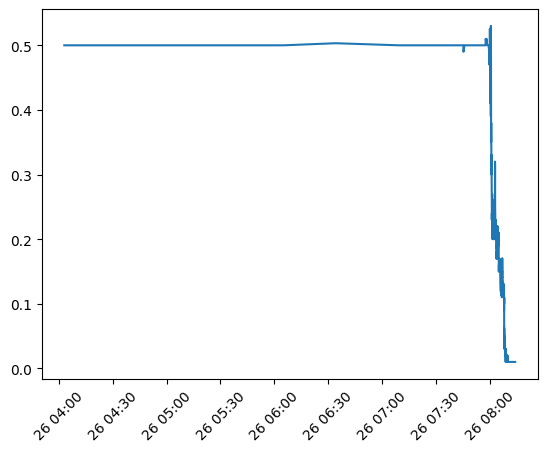

In [11]:
up_trades = trades[trades['outcome_index']==0].set_index('timestamp').sort_index()
down_trades = trades[trades['outcome_index']==1].set_index('timestamp').sort_index()
plt.plot(up_trades['price'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
fixed_strat = FixedSpreadStrategy(
    name="fixed_spread_2c",
    spread=0.1,
    size=100.0,
    inventory_limit=1000.0,
)

inventory_skew_strat = InventorySkewStrategy(
    name="inv_skew_2c_k0.1",
    spread=0.02,
    size=100.0,
    inventory_limit=1000.0,
    skew_k=0.1,
)

strategies = [fixed_strat, inventory_skew_strat]
strategies